In [56]:
import numpy as np

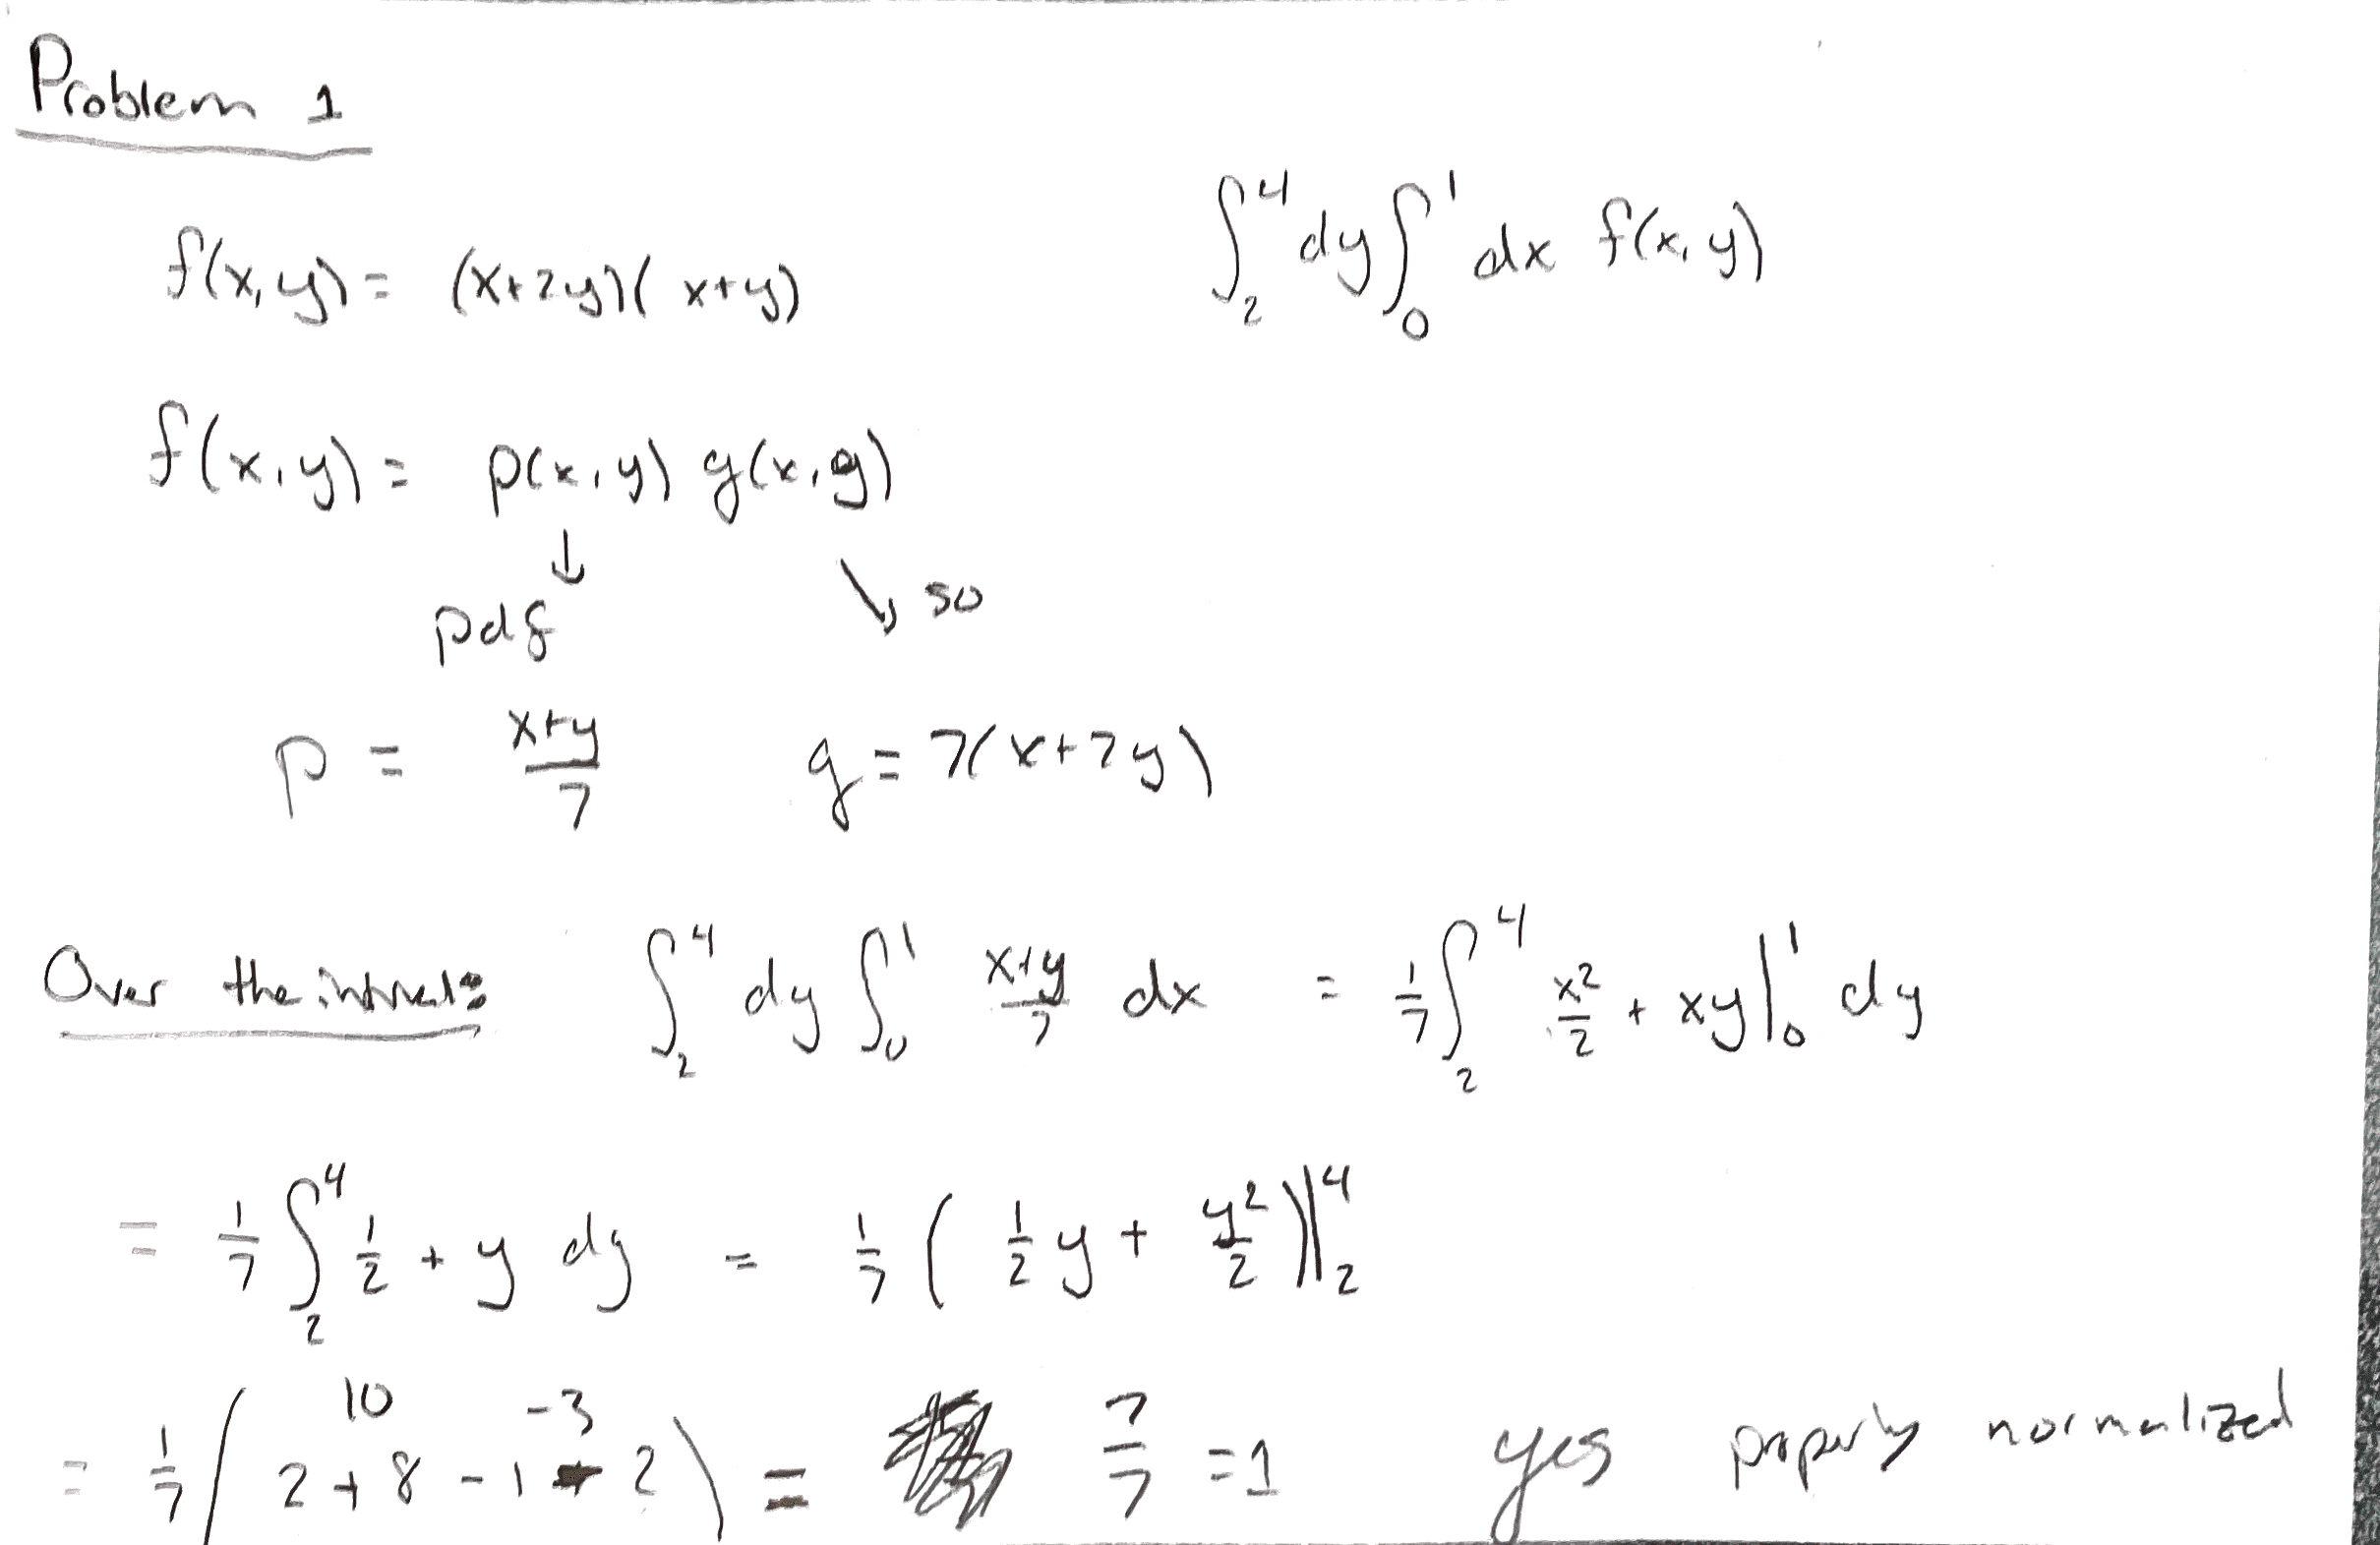

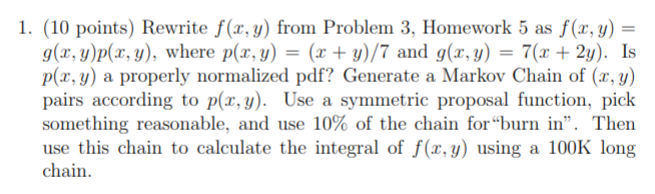

In [64]:
#New and Improved Metrpolis Hasting Algorithm for integration:

#The problem:
#integrate f(x,y) = (x+y)*(x+2*y) = p(x,y)*g(x,y) 
#before p(x,y) = uniform distrobution = 1/(b-a) * H(x-a) * H(x-b)  where H(x) = 0 for x<=0 and 1 for x>=0
#then MC integration was just Integral = (b-a)/N * sum(f(X,Y)), where X and Y are sampled from the Uniform Dist
#or more generally = Integeral = 1/N * sum(f(X,Y)/p(X,Y)) but f(X,Y)/p(X,y) here is just g(X,Y)!! cool

#But now p(x,y)  = (x+y)/7 ; it is no longer a constant
#sample this distrobution using Metropolis Hasting Algorithm
#Once we do the Intgeral is just 1/N * sum(g(X,Y)) where X and Y are sampled from p(x,y)=generated from MetroHast

def Metropolis(N,step_size,xbounds,ybounds,target_dist):
    xmin, xmax = xbounds[0], xbounds[1]
    ymin, ymax = ybounds[0], ybounds[1]
    #initaliaze acceptance arrays
    acc_x = np.zeros(N)
    acc_y = np.zeros(N)
    #Make initial values
    x0 = np.random.uniform(xmin,xmax)
    y0 = np.random.uniform(ymin,ymax)
    #Add initial values
    acc_x[0] = x0
    acc_y[0] = y0
    #Start random walk
    for istep in range(1,N):
        #make proposals for x and y
        xprop = acc_x[istep-1] + step_size*np.random.uniform(-1,1) #symmetric proposal function
        yprop = acc_y[istep-1] + step_size*np.random.uniform(-1,1)
        if xprop<xmin or yprop<ymin or xprop>xmax or yprop>ymax: #if out of bounds retry with new proposal
            acc_x[istep] = acc_x[istep-1]
            acc_y[istep] = acc_y[istep-1]
            continue #move to next iteration and don't complete the rest of code
        #ratio decides if we accept or reject prop
        ratio = np.minimum(target_dist(xprop,yprop)/target_dist(acc_x[istep-1],acc_y[istep-1]),1)
        if np.random.uniform(0,1) < ratio:
            acc_x[istep] = xprop
            acc_y[istep] = yprop
        else: 
            acc_x[istep] = acc_x[istep-1]
            acc_y[istep] = acc_y[istep-1]
    return acc_x, acc_y

def P(x,y): #target distrobution
    return (x+y)/7

def g(x,y): #integrand
    return 7*(x+2*y)

N = 10**6
acc_x, acc_y = Metropolis(N,0.05,(0,1),(2,4),P)

#General MC Method = Integral = 1/N * sum[ f(X)/p(X) ], where X are ind samplings of p(x)
#here f(X)/p(X) = g(X), so we can just take the mean of g(X)
#for 2D the genralization is trivial
burn_slice = int(0.1*N)
integral = np.mean( g(acc_x[burn_slice:],acc_y[burn_slice:]) ) #slice for burn in but not needed due to ergodic theorem
print(integral)

100000
47.06745787976631
